# Projet : -----------------

## Description
- *******
- *******
- *******
- *******
- *******



### Importer les librairies


In [556]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Stocker les dataframes dans des variables 


In [557]:
df = pd.read_csv('archive/googleplaystore.csv')
df_reviews = pd.read_csv('archive/googleplaystore_user_reviews.csv')

ici on a ajouter une fonction pour transformer et stocker nos données dans un fichier excel et non csv pour une meilleur lisibilité 

In [558]:
fichier_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore.xlsx'
fichier_review_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore_user_reviews.xlsx'

# Pour exporter le fichier en excel pour une meilleur lisibilité
# df.to_excel(fichier_excel, index=False)
# df_reviews.to_excel(fichier_review_excel, index=False)


## I) Exploration

#### a) Shape

In [559]:
df.shape

(10841, 13)

In [560]:
df_reviews.shape

(64295, 5)

#### b) Target

La target est la Colonne : **Category**
#### c) Data Types

In [561]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [562]:
df_reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

#### d) INSA
On vérifie si il y a des informations manquantes

In [563]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [564]:
df_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

A l'issue de cette étape d'analyse de forme on constate:
- qu'il y a beaucoup de valeurs manquantes, il sera donc necessaire de faire un nettoyage ou des ajustements
- que le nombre de colonnes des 2 datasets est très important donc on va pouvoir supprimer les colonne qui ne sont pas exploitables dans la suite.

##### 1. Nettoyage du dataset googleplaystore_reviews

In [565]:
df_reviews.dropna(subset=['Translated_Review'], inplace=True)
df_reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

##### 2. Nettoyage du dataset googleplaystore

In [566]:
df.dropna(subset=['Rating'], inplace=True)
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### e) Véracité des données

In [567]:
# l'id 10472 a une valuer Rating > 5.0
df_rating_fuzzy = df[df['Rating'] > 5] 
df_rating_fuzzy
df.drop(index=10472, inplace=True)

In [568]:
df['Size'].value_counts()

Size
Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: count, Length: 414, dtype: int64

In [569]:
df['Type'].value_counts()


Type
Free    8719
Paid     647
Name: count, dtype: int64

In [570]:
df['Genres'].value_counts()

Genres
Tools                      733
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: count, Length: 115, dtype: int64

In [571]:
# Supprimer les doublons
df = df.drop_duplicates(subset=['App'], keep='first')

# Sauvegarder le résultat ou afficher les premières lignes pour vérification
df.to_excel('googleplaystore_without_duplication.xlsx', index=False)
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

# II) Prétraitement des données

In [572]:
# Convertir 'Reviews' en entier
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Nettoyer et convertir 'Size' en megabytes
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convertir k en M
    return 0
    # return 'Varies with device' 

df['Size'] = df['Size'].map(convert_size)

# Convertir la colonne 'Installs' en un format numérique propre pour le traitement
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Nettoyer et convertir 'Price' en float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Convertir 'Last Updated' en format de date
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Afficher les types de données modifiés et les premières lignes pour vérification
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

# III) Analyse de fond



Variable: Category
Category est une variable qualitative

Modalités et leurs fréquences :

Category
FAMILY             1608
GAME                912
TOOLS               718
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     298
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: count, dtype: int64

Mode: FAMILY

Visualisation des fréquences des modalités (top 10) :



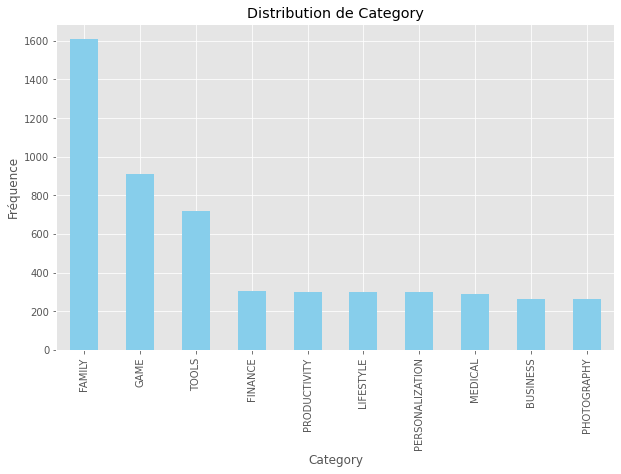



Variable: Type
Type est une variable qualitative

Modalités et leurs fréquences :

Type
Free    7592
Paid     604
Name: count, dtype: int64

Mode: Free

Visualisation des fréquences des modalités (top 10) :



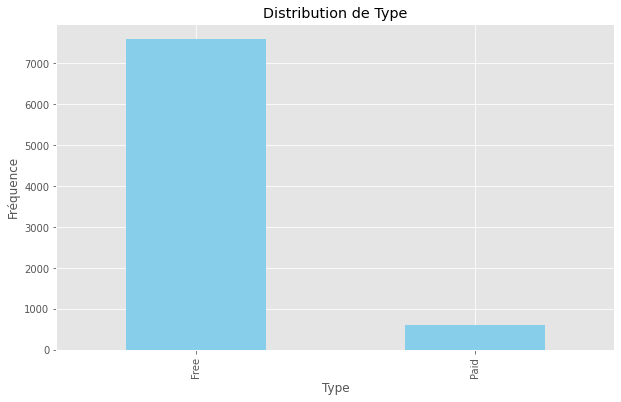



Variable: Last Updated
Last Updated est une variable qualitative

Modalités et leurs fréquences :

Last Updated
2018-08-03    245
2018-08-02    210
2018-08-01    199
2018-07-31    189
2018-07-30    148
2018-07-25    122
2018-07-26    120
2018-08-06    110
2018-07-24    105
2018-07-27    100
Name: count, dtype: int64

Mode: 2018-08-03 00:00:00

Visualisation des fréquences des modalités (top 10) :



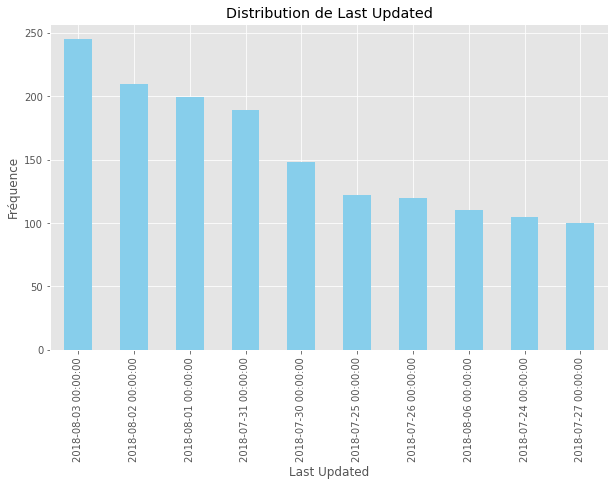



Variable: Content Rating
Content Rating est une variable qualitative

Modalités et leurs fréquences :

Content Rating
Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

Mode: Everyone

Visualisation des fréquences des modalités (top 10) :



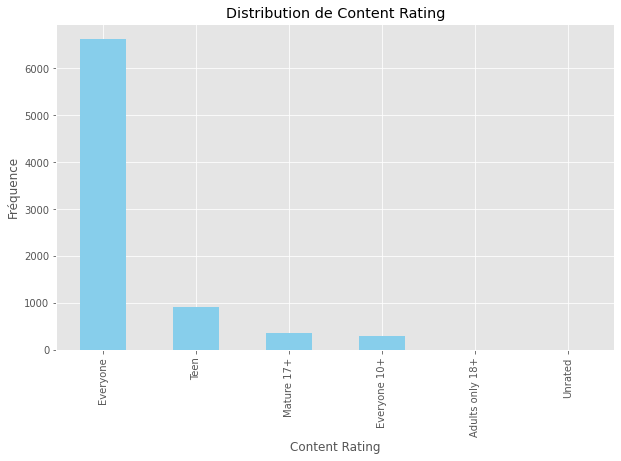



Variable: Genres
Genres est une variable qualitative

Modalités et leurs fréquences :

Genres
Tools              717
Entertainment      471
Education          429
Finance            302
Productivity       301
Lifestyle          300
Personalization    298
Action             292
Medical            290
Sports             266
Name: count, dtype: int64

Mode: Tools

Visualisation des fréquences des modalités (top 10) :



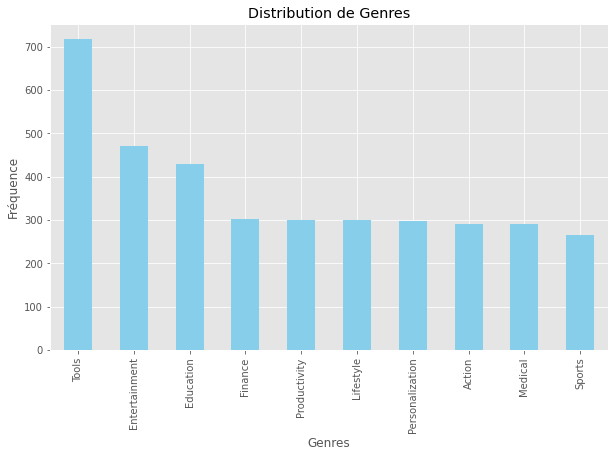



Variable: Current Ver
Current Ver est une variable qualitative

Modalités et leurs fréquences :

Current Ver
Varies with device    1011
1.0                    449
1.1                    191
1.2                    125
2.0                    117
1.3                    115
1.0.1                   76
1.4                     76
1.5                     72
1.0.0                   67
Name: count, dtype: int64

Mode: Varies with device

Visualisation des fréquences des modalités (top 10) :



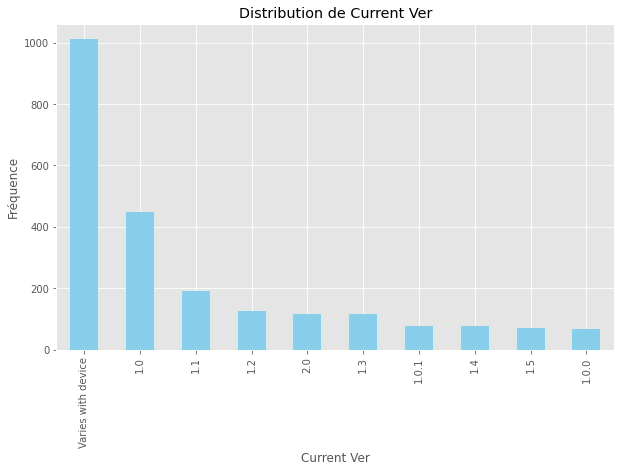



Variable: Android Ver
Android Ver est une variable qualitative

Modalités et leurs fréquences :

Android Ver
4.1 and up            1811
4.0.3 and up          1141
4.0 and up            1042
Varies with device     947
4.4 and up             713
2.3 and up             547
5.0 and up             447
4.2 and up             316
2.3.3 and up           232
2.2 and up             203
Name: count, dtype: int64

Mode: 4.1 and up

Visualisation des fréquences des modalités (top 10) :



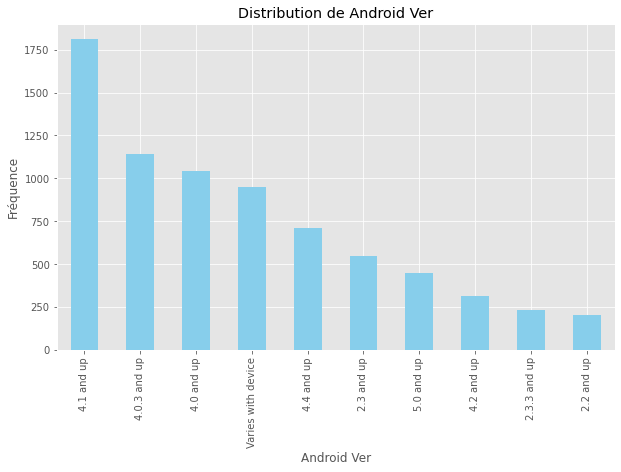



Rating est une variable quantitative

Statistiques descriptives:

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


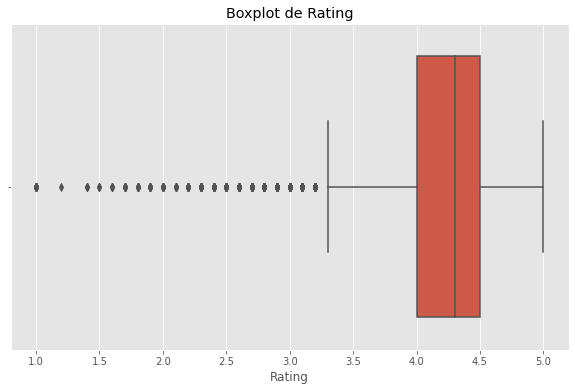


Histogramme pour visualiser la distribution:



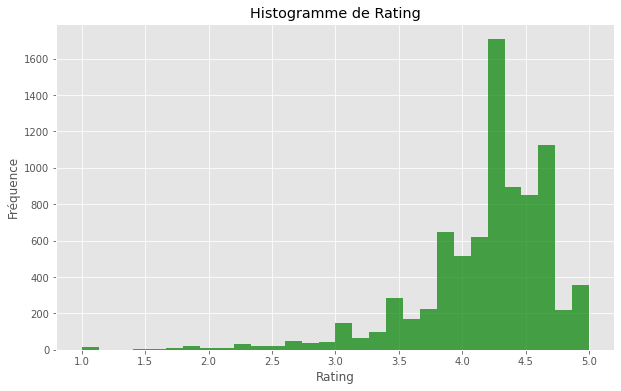



Reviews est une variable quantitative

Statistiques descriptives:

count    8.196000e+03
mean     2.552515e+05
std      1.985594e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.004000e+03
75%      4.381300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


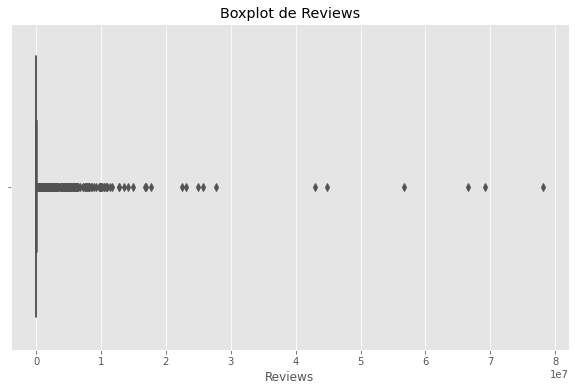


Histogramme pour visualiser la distribution:



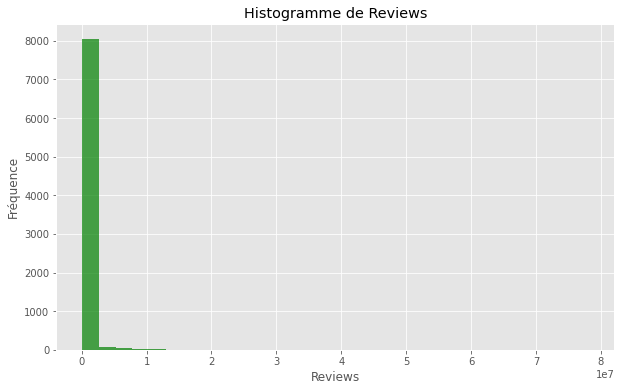



Size est une variable quantitative

Statistiques descriptives:

count    8196.000000
mean       18.651267
std        22.376517
min         0.000000
25%         2.800000
50%         9.400000
75%        27.000000
max       100.000000
Name: Size, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


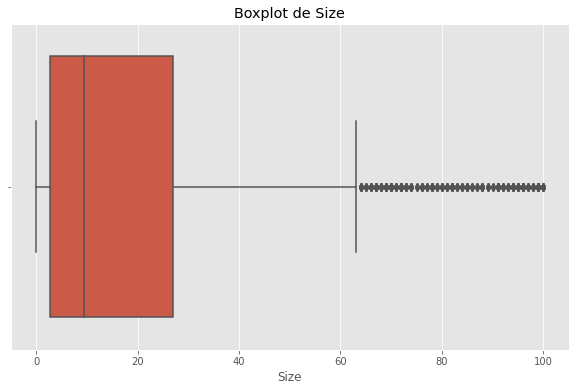


Histogramme pour visualiser la distribution:



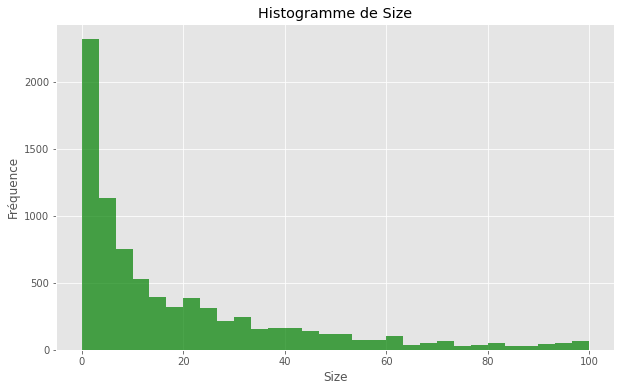



Installs est une variable quantitative

Statistiques descriptives:

count    8.196000e+03
mean     9.165090e+06
std      5.825087e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


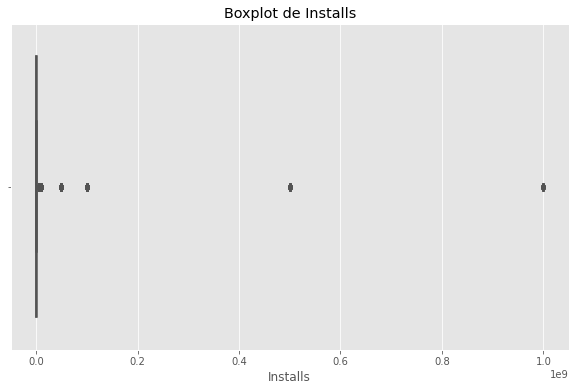


Histogramme pour visualiser la distribution:



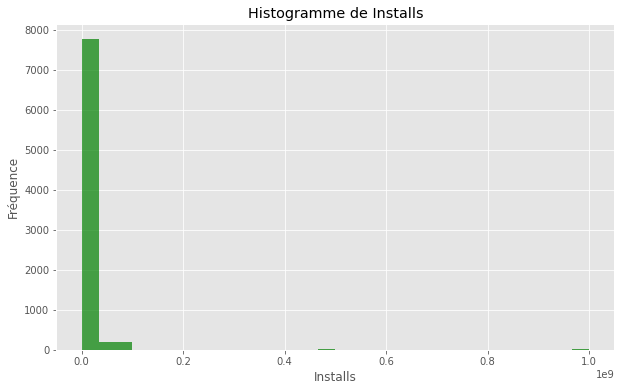



Price est une variable quantitative

Statistiques descriptives:

count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Boxplot pour visualiser la distribution:



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


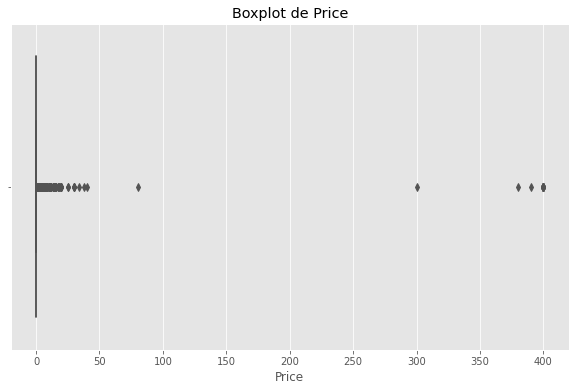


Histogramme pour visualiser la distribution:



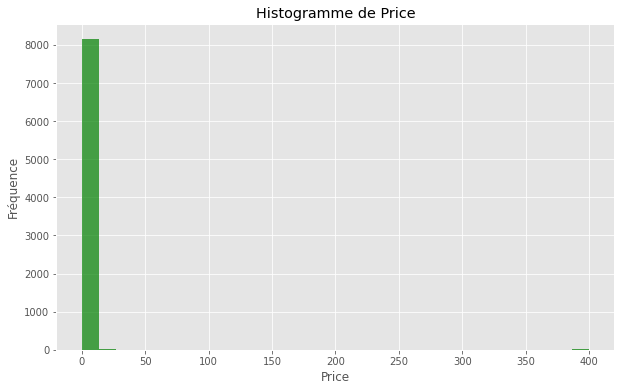

In [573]:
# Configurer Matplotlib
plt.style.use('ggplot')  # Pour utiliser le style ggplot
plt.rcParams['figure.figsize'] = (10, 6)  # Taille des figures

# Analyse des variables qualitatives
qualitative_vars = ["Category", "Type", "Last Updated", "Content Rating", "Genres", "Current Ver", "Android Ver"]
for var in qualitative_vars:
    print("\n\nVariable:", var)
    print(var + " est une variable qualitative")
    print("\nModalités et leurs fréquences :\n")
    print(df[var].value_counts().head(10))  # Afficher seulement les 10 premières modalités pour plus de clarté
    
    # Mode
    mode_val = df[var].mode()[0]
    print("\nMode:", mode_val)
    
    # Graphique des fréquences des modalités
    print("\nVisualisation des fréquences des modalités (top 10) :\n")
    df[var].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f'Distribution de {var}')
    plt.ylabel('Fréquence')
    plt.xlabel(var)
    plt.show()

# Analyse des variables quantitatives
quantitative_vars = ["Rating", "Reviews", "Size", "Installs", "Price"]
for var in quantitative_vars:
    print("\n\n" + var + " est une variable quantitative")
    
    # Statistiques descriptives
    print("\nStatistiques descriptives:\n")
    print(df[var].describe())
    
    # Boxplot pour visualiser la distribution
    print("\nBoxplot pour visualiser la distribution:\n")
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

    # Histogramme pour visualiser la distribution
    print("\nHistogramme pour visualiser la distribution:\n")
    df[var].hist(bins=30, color='green', alpha=0.7)
    plt.title(f'Histogramme de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


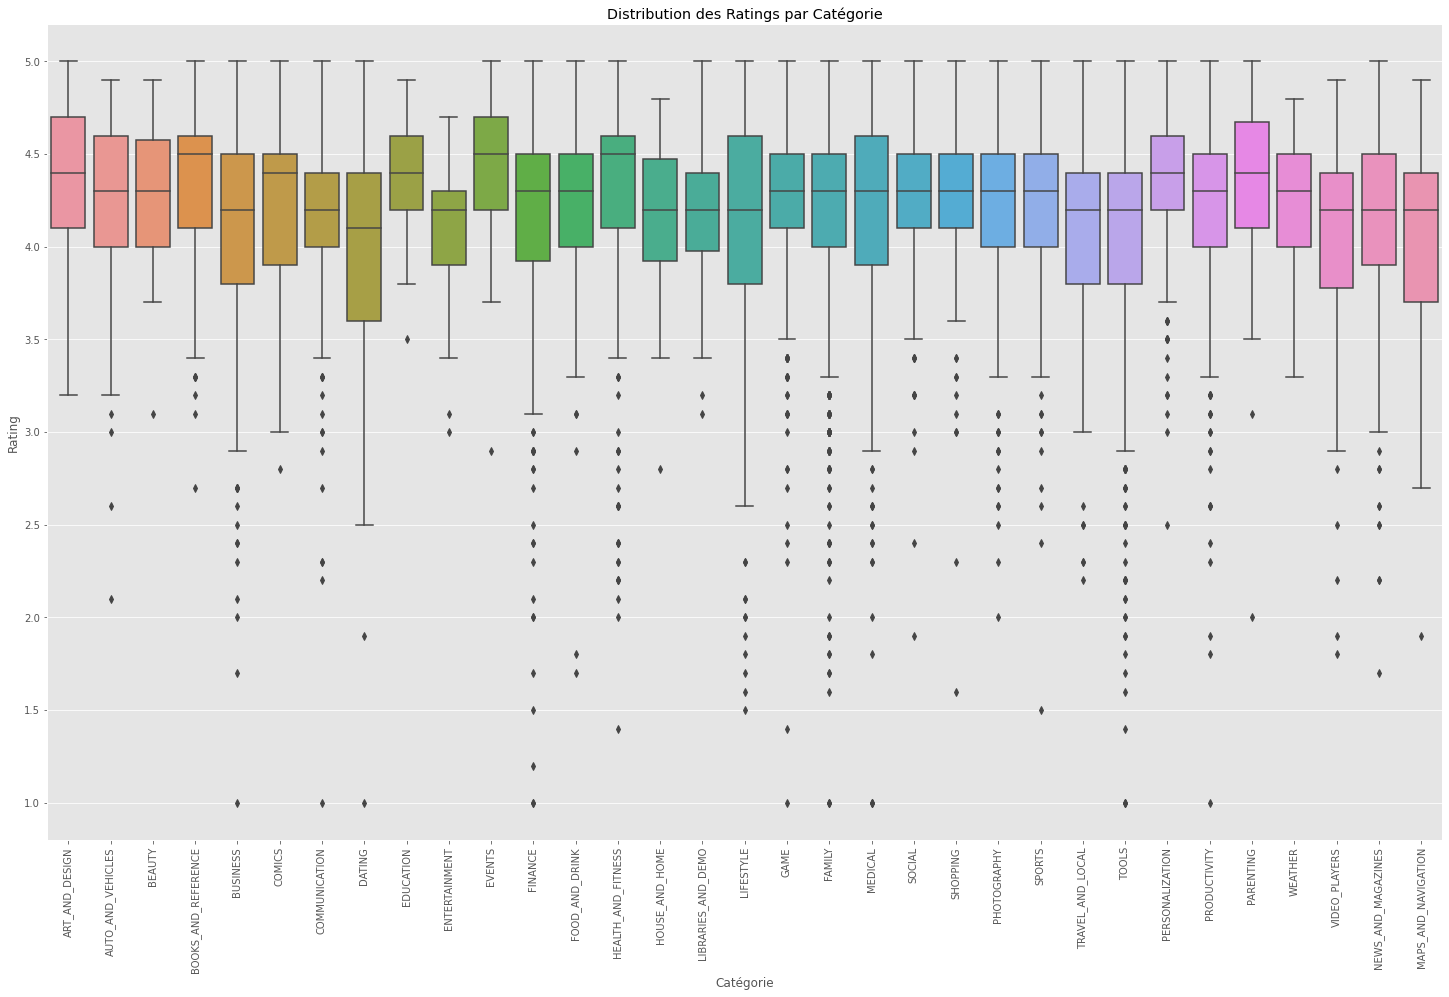

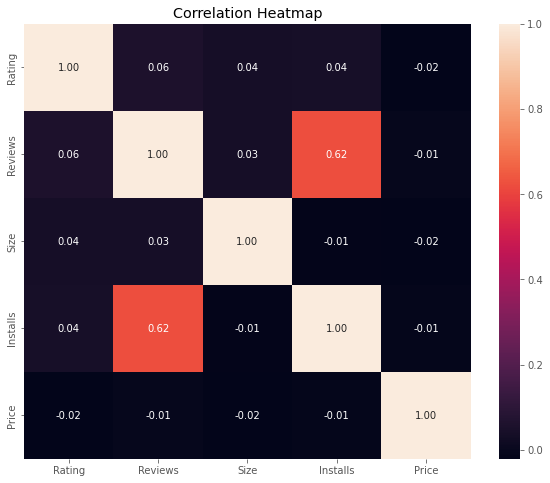

In [574]:
plt.figure(figsize=(25, 15))
sns.boxplot(data=df, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation= 90)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [575]:
# Liste des genres à conserver
category_to_keep = ["FAMILY", "BUSINESS", "TOOLS", "PRODUCTIVITY"]

# Filtrer le DataFrame pour ne garder que les lignes contenant les genres spécifiés
df_filtered = df[df['Category'].isin(category_to_keep)]
df_filtered

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,Free,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,Free,0.0,Everyone,Business,2018-07-17,3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,Free,0.0,Everyone,Business,2018-05-04,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000,Free,0.0,Everyone,Education,2018-06-13,2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up


In [576]:
# Calculer le premier quartile (Q1) et le troisième quartile (Q3)
Q1 = df_filtered.groupby('Category')['Rating'].quantile(0.25)
Q3 = df_filtered.groupby('Category')['Rating'].quantile(0.75)

# Calcul de l'IQR pour chaque catégorie
IQR = Q3 - Q1

# Définir le seuil pour les outliers bas
threshold_low = Q1 - 1.1 * IQR

# Appliquer le filtre pour supprimer les outliers bas
for category in df_filtered['Category'].unique():
    filter_condition = (df_filtered['Category'] == category) & (df_filtered['Rating'] < threshold_low[category])
    df_filtered = df_filtered[~filter_condition]

In [577]:
df_filtered.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,Free,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,Free,0.0,Everyone,Business,2018-07-17,3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,Free,0.0,Everyone,Business,2018-05-04,Varies with device,Varies with device


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


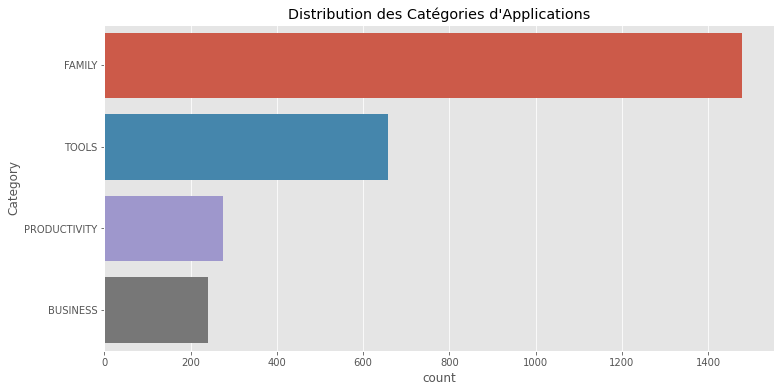

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


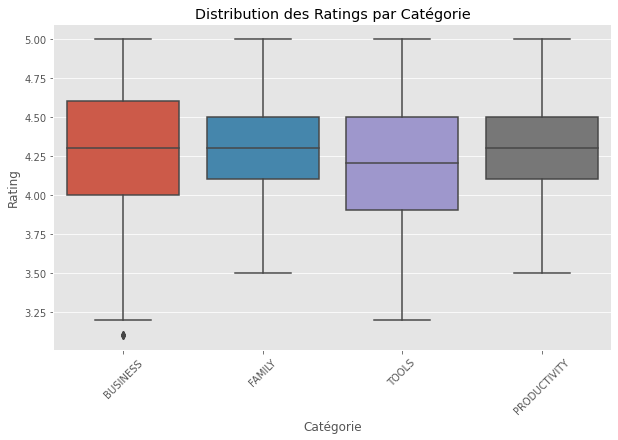

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


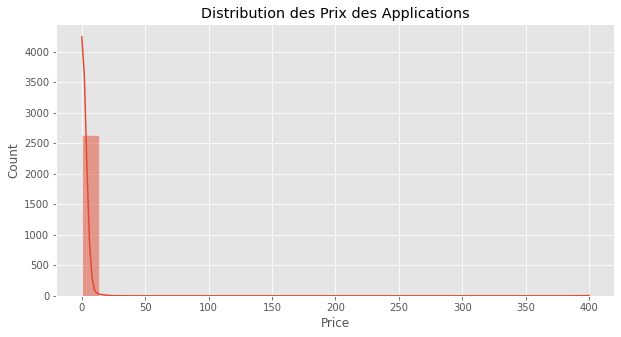

In [578]:
# Distribution des catégories d'applications
plt.figure(figsize=(12, 6))
sns.countplot(y=df_filtered['Category'], order=df_filtered['Category'].value_counts().index)
plt.title("Distribution des Catégories d'Applications")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

# Distribution des prix
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title('Distribution des Prix des Applications')
plt.show()


In [579]:

# Trouver l'application la plus populaire par catégorie
most_popular_apps = df_filtered.loc[df_filtered.groupby('Category')['Installs'].idxmax()]

# # Afficher les applications les plus populaires par catégorie
print(most_popular_apps[['Category', 'App', 'Installs', 'Rating']])


          Category                                     App    Installs  Rating
194       BUSINESS  OfficeSuite : Free Office + PDF Editor   100000000     4.3
3975        FAMILY                                 Hay Day   100000000     4.5
3454  PRODUCTIVITY                            Google Drive  1000000000     4.4
3234         TOOLS                                  Google  1000000000     4.4


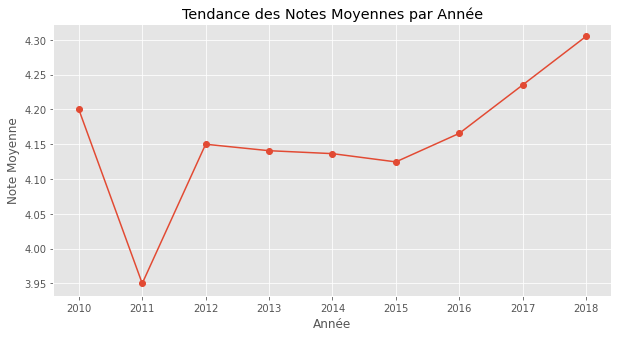

In [580]:
# Convertir 'Last Updated' en datetime
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])

# Calculer la moyenne des notes par année
ratings_over_time = df_filtered.groupby(df_filtered['Last Updated'].dt.year)['Rating'].mean()

# Tracer la tendance des notes au fil du temps
plt.figure(figsize=(10, 5))
ratings_over_time.plot(kind='line', marker='o')
plt.title('Tendance des Notes Moyennes par Année')
plt.xlabel('Année')
plt.ylabel('Note Moyenne')
plt.grid(True)
plt.show()


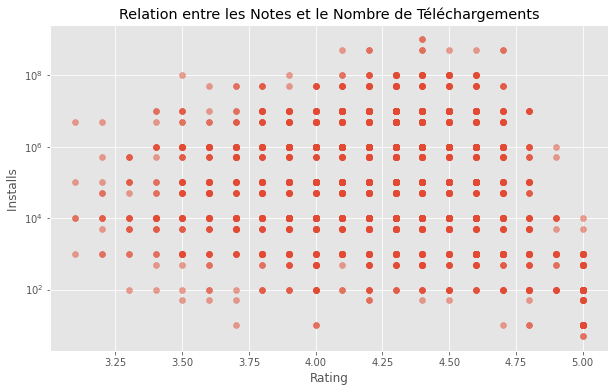

In [581]:
# Tracer un scatter plot pour examiner la relation entre les notes et le nombre de téléchargements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Rating'], df_filtered['Installs'], alpha=0.5)
plt.title('Relation entre les Notes et le Nombre de Téléchargements')
plt.xlabel('Rating')
plt.ylabel('Installs ')
plt.yscale('log')  
plt.grid(True)
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

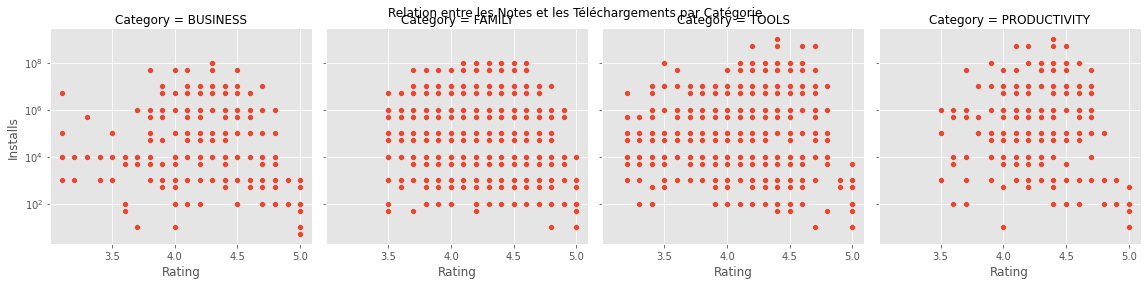

In [582]:
# Créer un scatter plot pour chaque catégorie
g = sns.FacetGrid(df_filtered, col="Category", col_wrap=4, height=4)
g.map(sns.scatterplot, "Rating", "Installs")

# Ajuster les échelles pour voir les tendances dans chaque catégorie
g.set(yscale="log")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relation entre les Notes et les Téléchargements par Catégorie')

# Afficher les graphiques
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

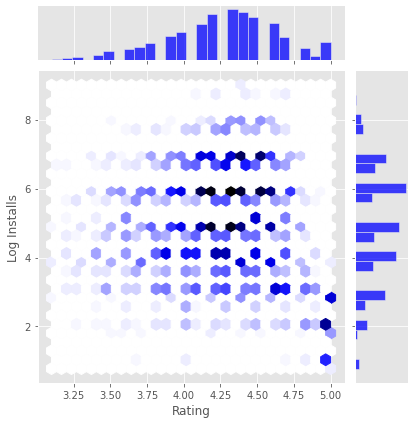

In [583]:
# Appliquer la transformation logarithmique directement aux données
df_filtered['Log Installs'] = np.log10(df_filtered['Installs'] + 1)  # Ajouter 1 pour éviter le log de zéro

# Créer un jointplot avec la transformation appliquée
sns.jointplot(x='Rating', y='Log Installs', data=df_filtered, kind='hex', color='blue')
plt.show()

# IV) Modele de Prédiction

In [584]:
from sklearn.preprocessing import OneHotEncoder


# Initialiser OneHotEncoder
encoder = OneHotEncoder()  # Retourne une matrice sparse par défaut

# Sélectionner les colonnes catégorielles
categorical_columns = ['Type', 'Content Rating']
categorical_data = df_filtered[categorical_columns]

# Appliquer OneHotEncoder sur les données catégorielles
encoded_data = encoder.fit_transform(categorical_data)

# Créer un DataFrame avec les données encodées à partir de la matrice sparse
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concaténer le DataFrame encodé avec les autres données
# Assurez-vous de réinitialiser l'index si nécessaire pour éviter des problèmes de concaténation
df_filtered.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
full_data = pd.concat([df_filtered, encoded_df], axis=1)

# Supprimer les colonnes catégorielles originales car elles sont maintenant remplacées par leur version encodée
full_data.drop(columns=categorical_columns, inplace=True)

# Afficher les premières lignes du nouveau DataFrame pour vérification
full_data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,Varies with device,7.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,Varies with device,7.69897,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,Varies with device,7.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,5.0 and up,6.69897,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,Varies with device,6.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [585]:
# Définir la cible en fonction des catégories d'intérêt
full_data['Target'] = full_data['Category'].apply(
    lambda x: 'Demoli' if x in ['TOOLS', 'PRODUCTIVITY'] else ('Ajmi' if x in ['FAMILY', 'BUSINESS'] else 'None')
)


In [586]:
from sklearn.model_selection import train_test_split

# Sélectionner les features et la cible
X = full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])  # Exclure les colonnes non numériques et la cible
y = full_data['Target']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [587]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [588]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


Précision du modèle : 74.58%


In [589]:
# Filtrer les applications pour Mme Ajmi et M. Demoli
predictions = model.predict(full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']))
full_data['Prediction'] = predictions

# Afficher les résultats filtrés
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']


In [590]:
full_data[full_data['Target'] == 'Ajmi']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,...,6.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,0.0,Education,2018-06-27,3.8.0,...,3.000434,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
2648,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000,0.0,Education,2018-06-13,2.0.20,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2649,FR Calculator,FAMILY,4.0,7,2.6,500,0.0,Education,2017-06-18,1.0.0,...,2.699838,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2650,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,0.0,Education,2017-07-25,1.48,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


In [591]:
full_data[full_data['Target'] == 'Demoli']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
242,Moto File Manager,TOOLS,4.1,38655,5.9,10000000,0.0,Tools,2018-02-01,v3.7.93,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
243,Google,TOOLS,4.4,8033493,0.0,1000000000,0.0,Tools,2018-08-03,Varies with device,...,9.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
244,Google Translate,TOOLS,4.4,5745093,0.0,500000000,0.0,Tools,2018-08-04,Varies with device,...,8.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
245,Moto Display,TOOLS,4.2,18239,0.0,10000000,0.0,Tools,2018-08-06,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
246,Motorola Alert,TOOLS,4.2,24199,3.9,50000000,0.0,Tools,2014-11-21,1.02.53,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,ChopAssistant,TOOLS,4.2,455,2.8,50000,0.0,Tools,2017-02-28,1.6,...,4.698979,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
2637,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0,100000,0.0,Tools,2018-05-10,1.74,...,5.000004,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2638,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8,1000000,0.0,Tools,2018-07-26,1.9.734,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2639,FR Roster,TOOLS,4.1,174,12.0,5000,0.0,Tools,2018-07-30,6.04,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi


In [592]:
from sklearn.neighbors import KNeighborsClassifier

# Initialiser le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [593]:
# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [594]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))


Précision du modèle KNN : 64.60%


In [595]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner à nouveau le modèle KNN avec les données standardisées
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Précision après standardisation : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Précision après standardisation : 75.71%


In [596]:
from sklearn.model_selection import GridSearchCV

# Grille de paramètres à tester
param_grid = {'n_neighbors': range(1, 20)}

# Recherche par grille avec validation croisée
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Meilleur nombre de voisins
print("Meilleur nombre de voisins:", knn_cv.best_params_)
print("Meilleure précision obtenue : {:.2f}%".format(knn_cv.best_score_ * 100))


Meilleur nombre de voisins: {'n_neighbors': 19}
Meilleure précision obtenue : 74.96%


In [597]:
# Tester avec la distance de Manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
print("Précision avec Manhattan : {:.2f}%".format(accuracy_score(y_test, y_pred_manhattan) * 100))


Précision avec Manhattan : 76.27%


In [598]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle d'arbre de décision
tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limiter la profondeur de l'arbre pour éviter le surajustement

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
filtered_apps_demoli
filtered_apps_ajmi

Précision de l'arbre de décision : 74.95%


,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,...,6.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
7,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35.0,100000000,0.0,Business,2018-08-02,9.7.14188,...,8.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
8,USPS MOBILE®,BUSINESS,3.9,16589,9.1,1000000,0.0,Business,2018-06-14,4.9.10,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
9,Job Search by ZipRecruiter,BUSINESS,4.8,148945,25.0,1000000,0.0,Business,2018-07-19,5.2.8,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
10,Curriculum vitae App CV Builder Free Resume Maker,BUSINESS,4.5,4458,3.9,500000,0.0,Business,2018-07-08,3.3,...,5.698971,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,HTC Sense Input - FR,TOOLS,4.0,885,8.0,100000,0.0,Tools,2015-10-30,1.0.612928,...,5.000004,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
2647,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,0.0,Education,2018-06-27,3.8.0,...,3.000434,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
2648,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000,0.0,Education,2018-06-13,2.0.20,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2650,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,0.0,Education,2017-07-25,1.48,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


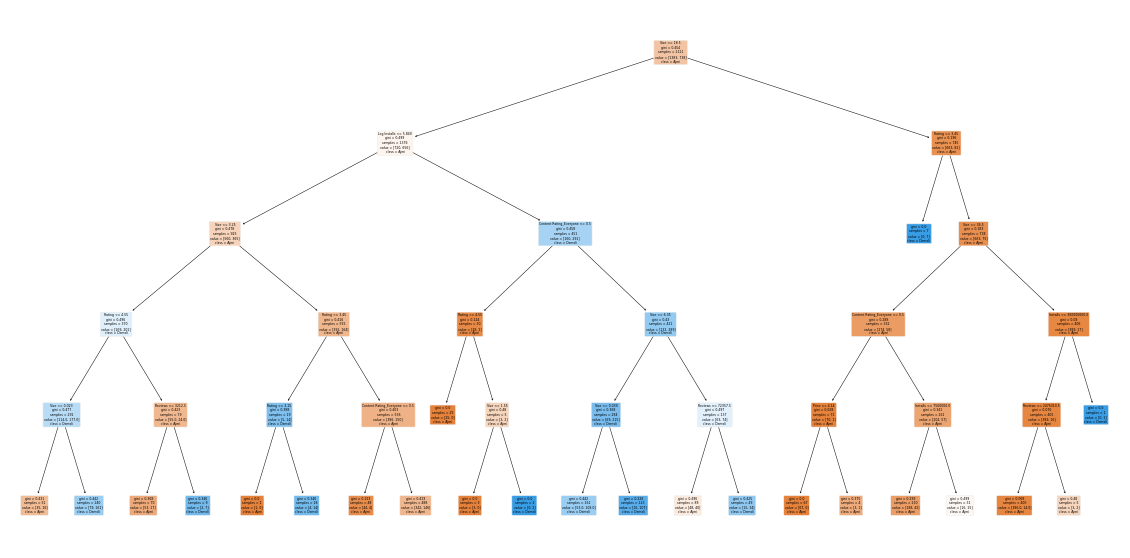

In [599]:
from sklearn.tree import plot_tree

# Supposons que 'tree' est votre modèle d'arbre de décision entraîné
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True)
plt.show()

In [600]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle d'arbre de décision
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiter la profondeur de l'arbre pour éviter le surajustement

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
print(filtered_apps_demoli.head())
print(filtered_apps_ajmi.head())

Précision de l'arbre de décision : 76.27%
                             App  Category  Rating  Reviews  Size  Installs  \
0   Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   0.0  10000000   
1              Indeed Job Search  BUSINESS     4.3   674730   0.0  50000000   
2                    Uber Driver  BUSINESS     4.4  1254730   0.0  10000000   
4         Snag - Jobs Hiring Now  BUSINESS     4.3    32584   0.0   1000000   
5  Docs To Go™ Free Office Suite  BUSINESS     4.1   217730   0.0  50000000   

   Price    Genres Last Updated         Current Ver  ... Log Installs  \
0    0.0  Business   2018-07-30  Varies with device  ...      7.00000   
1    0.0  Business   2018-05-21  Varies with device  ...      7.69897   
2    0.0  Business   2018-08-03  Varies with device  ...      7.00000   
4    0.0  Business   2018-05-04  Varies with device  ...      6.00000   
5    0.0  Business   2018-04-02  Varies with device  ...      7.69897   

   Type_Free  Type_Paid  Content Rating_Ever

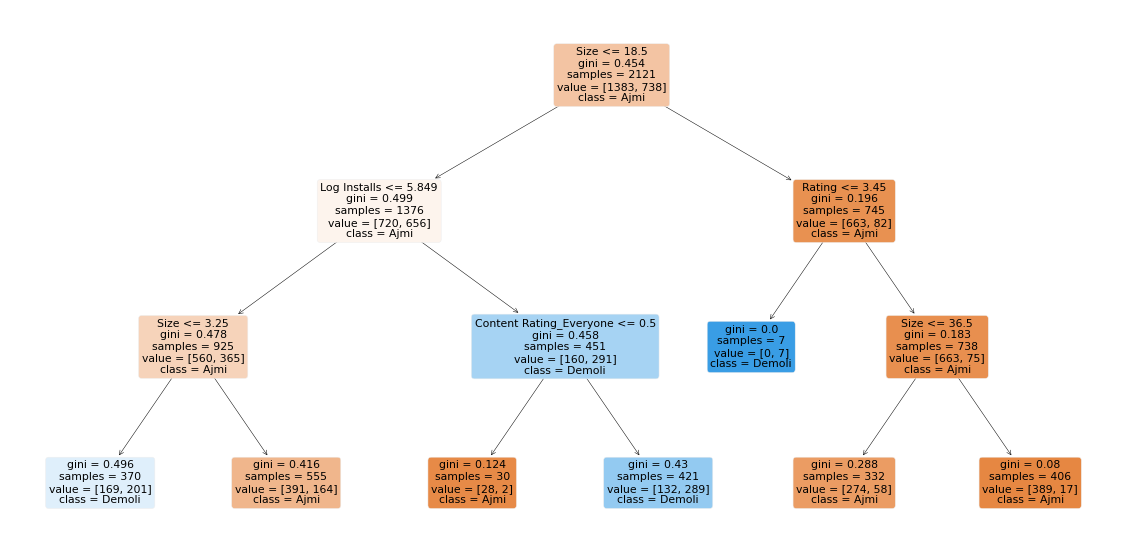

In [601]:
from sklearn.tree import plot_tree

# Supposons que 'tree' est votre modèle d'arbre de décision entraîné
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True)
plt.show()

In [602]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
full_data[['Rating', 'Installs', 'Reviews']] = scaler.fit_transform(full_data[['Rating', 'Installs', 'Reviews']])
full_data

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
0,Visual Voicemail by MetroPCS,BUSINESS,0.526316,3.757993e-04,0.0,9.999995e-03,0.0,Business,2018-07-30,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
1,Indeed Job Search,BUSINESS,0.631579,1.572189e-02,0.0,5.000000e-02,0.0,Business,2018-05-21,Varies with device,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2,Uber Driver,BUSINESS,0.684211,2.923650e-02,0.0,9.999995e-03,0.0,Business,2018-08-03,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
3,ADP Mobile Solutions,BUSINESS,0.631579,1.984876e-03,29.0,4.999995e-03,0.0,Business,2018-07-17,3.4.2,...,6.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
4,Snag - Jobs Hiring Now,BUSINESS,0.631579,7.592180e-04,0.0,9.999950e-04,0.0,Business,2018-05-04,Varies with device,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,Fr. Daoud Lamei,FAMILY,1.000000,4.893220e-07,8.6,9.950000e-07,0.0,Education,2018-06-27,3.8.0,...,3.000434,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
2648,Fr Agnel Ambarnath,FAMILY,0.578947,2.702922e-06,13.0,4.995000e-06,0.0,Education,2018-06-13,2.0.20,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
2649,FR Calculator,FAMILY,0.473684,1.398063e-07,2.6,4.950000e-07,0.0,Education,2017-06-18,1.0.0,...,2.699838,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2650,Sya9a Maroc - FR,FAMILY,0.736842,8.621388e-07,53.0,4.995000e-06,0.0,Education,2017-07-25,1.48,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


In [603]:
# Ponderation: Rating (40%), Installs (30%), Reviews (20%), Free (10%)

full_data['Score'] = 0.4 * full_data['Rating'] + 0.3 * full_data['Installs'] + 0.2 * full_data['Reviews'] + 0.1 * full_data['Type_Free']


In [604]:
def recommend_apps(category, num_apps=5):
    filtered_apps = full_data[full_data['Category'] == category]
    top_apps = filtered_apps.sort_values(by='Score', ascending=False).head(num_apps)
    return top_apps[['App', 'Category', 'Score']]

# Exemple d'utilisation de la fonction
print(recommend_apps('FAMILY'))
print(recommend_apps('BUSINESS'))
print(recommend_apps('TOOLS'))
print(recommend_apps('PRODUCTIVITY'))

                                 App Category     Score
2271        Ek Bander Ne Kholi Dukan   FAMILY  0.500003
1357  Barisal University App-BU Face   FAMILY  0.500001
2265                      Master E.K   FAMILY  0.500001
1691     CS & IT Interview Questions   FAMILY  0.500000
1095          Quran Khmer Offline AY   FAMILY  0.500000
                                     App  Category  Score
1533                  CK Employee Portal  BUSINESS    0.5
1048  Jobs in Canada - Emplois au Canada  BUSINESS    0.5
860                Ag Valley Cooperative  BUSINESS    0.5
2614                                  FN  BUSINESS    0.5
2195                              EF App  BUSINESS    0.5
                                                    App Category     Score
486             Clean Master- Space Cleaner & Antivirus    TOOLS  0.786842
243                                              Google    TOOLS  0.711122
1546  Security Master - Antivirus, VPN, AppLock, Boo...    TOOLS  0.702886
261             

In [605]:
df = pd.merge(df, df_reviews, on='App')

# Conversion des types de données pour la polarité et la subjectivité
df['Sentiment_Polarity'] = df['Sentiment_Polarity'].astype(float)
df['Sentiment_Subjectivity'] = df['Sentiment_Subjectivity'].astype(float)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


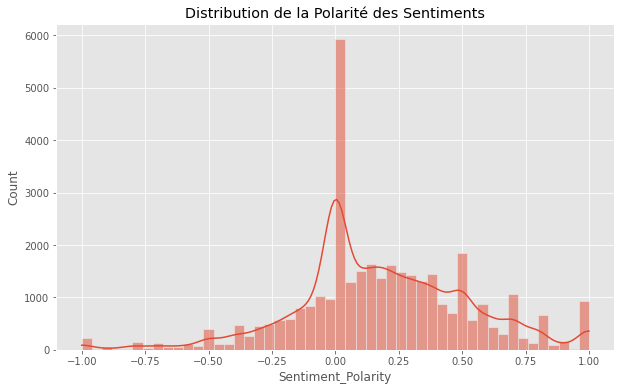

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


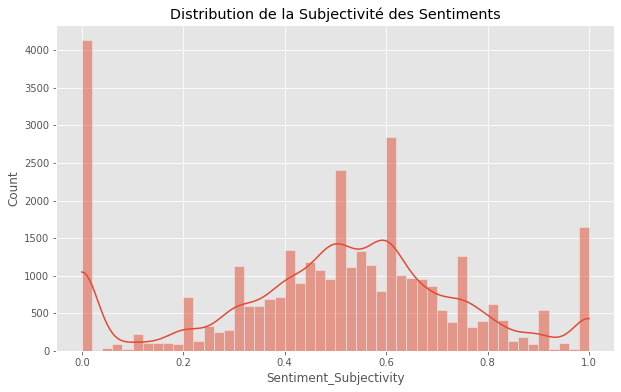

In [606]:
# Distribution de la polarité
sns.histplot(df['Sentiment_Polarity'], bins=50, kde=True)
plt.title('Distribution de la Polarité des Sentiments')
plt.show()

# Distribution de la subjectivité
sns.histplot(df['Sentiment_Subjectivity'], bins=50, kde=True)
plt.title('Distribution de la Subjectivité des Sentiments')
plt.show()

In [613]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 7. Predict review sentiment polarity and subjectivity
df.dropna(subset=['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_reviews = tfidf.fit_transform(df['Translated_Review']).toarray()

y_polarity = (df['Sentiment_Polarity'] > 0).astype(int)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_reviews, y_polarity, test_size=0.3, random_state=42)

y_subjectivity = (df['Sentiment_Subjectivity'] > 0.5).astype(int)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_reviews, y_subjectivity, test_size=0.3, random_state=42)

polarity_model = LogisticRegression(max_iter=1000)
polarity_model.fit(X_train_p, y_train_p)
y_pred_p = polarity_model.predict(X_test_p)
print('Polarity Model Accuracy:', accuracy_score(y_test_p, y_pred_p))
print('Polarity Model Report:\n', classification_report(y_test_p, y_pred_p))

subjectivity_model = RandomForestClassifier()
subjectivity_model.fit(X_train_s, y_train_s)
y_pred_s = subjectivity_model.predict(X_test_s)
print('Subjectivity Model Accuracy:', accuracy_score(y_test_s, y_pred_s))
print('Subjectivity Model Report:\n', classification_report(y_test_s, y_pred_s))

Polarity Model Accuracy: 0.8734576491325726
Polarity Model Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      3875
           1       0.91      0.89      0.90      6904

    accuracy                           0.87     10779
   macro avg       0.86      0.87      0.86     10779
weighted avg       0.87      0.87      0.87     10779

Subjectivity Model Accuracy: 0.8707672325818722
Subjectivity Model Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      5231
           1       0.87      0.88      0.87      5548

    accuracy                           0.87     10779
   macro avg       0.87      0.87      0.87     10779
weighted avg       0.87      0.87      0.87     10779

